In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal, plot_performance

from RandomSeedSearchCV import RandomSeedSearchCV

#### Load data, clean, split into training/testing, etc.

In [2]:
X_train,X_test,y_train,y_test,w_train,w_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                                             weight='COHORT_CNT',
                                                                             expand=False,
                                                                             clean=True,
                                                                             split=0.1,
                                                                             return_pipeline=True,
                                                                             fmt='numpy',
                                                                             random_state=24)
wmax = np.max([np.max(w_train),np.max(w_test)])
w_train /= wmax
w_test  /= wmax
w_train = 1 - (1-0.3)*(1-w_train)
w_test = 1 - (1-0.3)*(1-w_test)
print(min(w_train),max(w_train))

0.30285714285714294 1.0


#### Try a test neural net.

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]],kernel_initializer='he_normal'),
    keras.layers.Dense(15,activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(10,activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5,activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(1,activation='relu',kernel_initializer='he_normal'),
])
optimizer = keras.optimizers.Adam()
#optimizer = keras.optimizers.SGD(lr=0.1,momentum=0.2,decay=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 20)                400       
_________________________________________________________________
dense_41 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 6         
Total params: 936
Trainable params: 936
Non-trainable params: 0
_________________________________________________________________


In [28]:
w_train /= np.max(w_train)
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1,sample_weight=w_train)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Train on 58376 samples, validate on 6487 samples
Epoch 1/25
58376/58376 [==============================] - 13s 229us/sample - loss: 1.4772 - val_loss: 1.2226
Epoch 2/25
58376/58376 [==============================] - 9s 147us/sample - loss: 1.0271 - val_loss: 1.0784
Epoch 3/25
58376/58376 [==============================] - 9s 158us/sample - loss: 0.8950 - val_loss: 1.0116
Epoch 4/25
58376/58376 [==============================] - 10s 166us/sample - loss: 0.8388 - val_loss: 0.9526
Epoch 5/25
58376/58376 [==============================] - 10s 169us/sample - loss: 0.8002 - val_loss: 1.0325
Epoch 6/25
58376/58376 [==============================] - 11s 186us/sample - loss: 0.7863 - val_loss: 0.9993
Epoch 7/25
58376/58376 [==============================] - 10s 165us/sample - loss: 0.7800 - val_loss: 0.8787
Epoch 8/25
58376/58376 [==============================] - 10s 169us/sample - loss: 0.7567 - val_loss: 0.9216
Epoch 9/25
58376/58376 [==============================] - 10s 170us/sample - loss

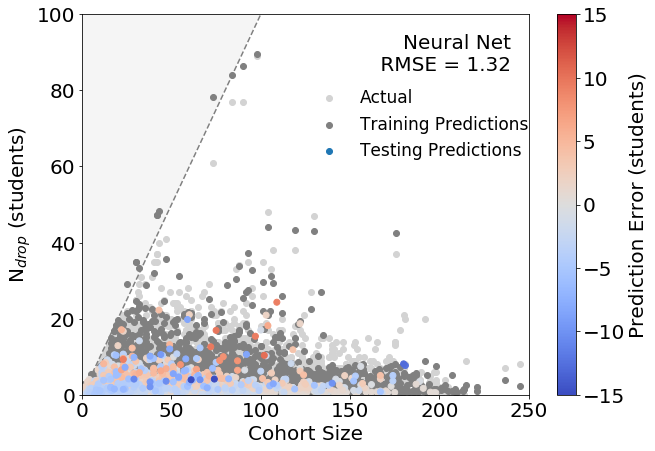

In [29]:
#model = keras.models.load_model("saved_models/weighted_neuralnet_attempt1.h5")
ax = plot_performance(model,'Neural Net',X_train,X_test,y_train,y_test,random_state=24)
#ax.figure.savefig('figures/weighted_neuralnet_attempt1_summary.png',dpi=450)

In [30]:
model.save("saved_models/weighted_neuralnet_attempt2.h5")